In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition, tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, make_scorer, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE
from pybaselines import Baseline, utils

pd.set_option("display.max_columns", 100)

In [176]:
data = pd.read_csv('raw_data.csv')
data

,labels,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,...,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,1761,1762,1763,1764,1765,1766,1767,1768,1769,1770,1771,1772,1773,1774,1775,1776,1777,1778,1779,1780,1781,1782,1783,1784,1785,1786,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796,1797,1798,1799,1800
0,Hec,2013.9,2013.0,2012.0,2012.4,2013.3,2014.2,2014.0,2012.6,2011.2,2010.0,2009.9,2009.8,2009.7,2010.8,2012.2,2013.5,2014.1,2014.3,2014.6,2014.8,2014.9,2015.1,2015.2,2014.5,2013.9,2013.2,2012.1,2010.9,2009.7,2009.1,2009.3,2009.5,2009.8,2010.4,2011.0,2011.6,2014.2,2016.9,2019.6,2021.0,2022.1,2023.1,2022.9,2020.7,2018.6,2016.7,2016.7,2016.7,2016.7,...,1819.1,1818.6,1818.2,1817.9,1817.8,1817.4,1815.4,1813.5,1813.3,1814.4,1815.2,1814.4,1813.7,1813.7,1814.5,1815.3,1814.2,1813.2,1813.0,1813.7,1814.3,1813.3,1812.3,1812.8,1815.1,1817.5,1817.1,1816.4,1816.7,1818.5,1820.3,1818.3,1815.1,1813.0,1814.3,1815.6,1814.6,1812.8,1811.7,1813.4,1815.2,1815.5,1815.2,1815.2,1816.4,1817.6,1817.8,1817.5,1817.3,1817.3
1,Hec,1955.2,1955.1,1955.0,1954.3,1953.4,1952.5,1951.7,1951.0,1950.3,1949.3,1946.8,1944.3,1941.8,1941.4,1941.5,1941.7,1941.6,1941.5,1941.4,1941.7,1943.1,1944.4,1945.8,1947.2,1948.6,1950.0,1950.8,1951.4,1952.0,1952.5,1953.1,1953.6,1953.8,1953.1,1952.5,1951.8,1952.7,1953.9,1955.0,1955.3,1955.3,1955.3,1955.1,1954.6,1954.1,1953.6,1951.7,1949.8,1947.9,...,1814.6,1814.4,1814.1,1814.9,1816.2,1817.1,1815.4,1813.7,1812.5,1811.7,1810.9,1809.9,1808.8,1808.9,1810.0,1811.0,1809.7,1808.4,1806.5,1804.2,1801.8,1800.7,1799.6,1799.8,1801.5,1803.2,1804.4,1805.6,1806.5,1807.0,1807.6,1806.1,1803.9,1802.6,1803.6,1804.7,1803.9,1802.3,1801.5,1803.9,1806.2,1808.0,1809.5,1810.9,1811.9,1812.9,1812.8,1812.0,1810.9,1808.0
2,Hec,1924.2,1922.8,1921.4,1920.6,1920.1,1919.6,1919.4,1919.6,1919.8,1920.0,1920.1,1920.2,1920.3,1919.1,1917.7,1916.2,1914.5,1912.6,1910.7,1909.9,1912.1,1914.3,1916.5,1918.6,1920.7,1922.8,1923.5,1923.8,1924.1,1924.3,1924.2,1924.1,1924.1,1924.4,1924.7,1925.0,1926.5,1928.2,1929.8,1930.9,1931.7,1932.5,1932.4,1930.8,1929.2,1927.6,1926.0,1924.4,1922.9,...,1802.7,1804.7,1806.7,1807.0,1806.6,1806.4,1807.2,1808.0,1806.7,1804.1,1801.7,1801.5,1801.4,1801.2,1800.9,1800.7,1801.8,1802.8,1803.6,1804.1,1804.7,1804.0,1803.4,1802.9,1802.8,1802.7,1801.7,1800.6,1799.9,1799.6,1799.4,1800.3,1801.7,1803.1,1804.7,1806.3,1806.9,1807.1,1807.2,1806.5,1805.9,1805.0,1804.1,1803.3,1803.0,1802.8,1802.5,1802.2,1801.9,1801.0
3,Hec,1946.3,1945.4,1944.5,1944.6,1945.1,1945.5,1944.9,1943.4,1941.9,1940.6,1940.2,1939.8,1939.4,1940.4,1941.6,1942.9,1944.0,1945.0,1946.0,1946.8,1946.9,1947.1,1947.3,1947.1,1946.9,1946.7,1945.9,1944.9,1943.9,1943.7,1944.7,1945.6,1946.6,1947.7,1948.8,1950.1,1951.1,1952.2,1953.4,1953.1,1952.3,1951.5,1950.3,1948.7,1947.1,1945.7,1945.4,1945.0,1944.7,...,1815.4,1814.5,1813.6,1812.9,1812.4,1812.1,1813.1,1814.0,1813.7,1812.8,1811.9,1810.7,1809.5,1808.6,1807.9,1807.3,1807.7,1808.1,1808.3,1808.3,1808.3,1806.9,1805.5,1805.4,1807.0,1808.6,1808.6,1808.4,1808.1,1807.6,1807.1,1805.9,1804.4,1803.9,1806.3,1808.7,1810.5,1812.1,1813.3,1813.3,1813.3,1812.7,1811.9,1811.0,1809.4,1807.8,1807.6,1808.0,1808.0,1806.4
4,Hec,1909.0,1909.0,1909.0,1909.2,1909.4,1909.6,1908.8,1907.1,1905.4,1903.7,1902.2,1900.7,1899.2,1900.0,1901.2,1902.3,1903.7,1905.3,1906.9,1908.4,1909.8,1911.1,1912.2,1911.5,1910.8,1910.1,1908.4,1906.4,1904.4,1903.3,1903.2,1903.1,1902.9,1902.5,1902.1,1901.8,1903.9,1906.2,1908.4,1910.4,1912.2,1914.0,1915.1,1915.4,1915.7,1916.0,1915.7,1915.3,1915.0,...,1802.7,1801.8,1801.0,1799.4,1797.5,1795.8,1794.9,1794.0,1794.0,1794.5,1795.0,1795.0,1795.0,1794.6,1793.9,1793.3,1792.6,1792.0,1791.8,1792.1,1792.3,1791.9,1791.5,1791.8,1792.7,1793.7,1792.6,1791.4,1791.1,1792.1,1793.1,1792.8,1792.2,1792.0,1793.2,1794.4,1794.9,1795.1,1795.5,1796.3,1797.1,1796.9,1796.4,1795.8,1794.9,1794.0,1794.0,1794.4,1794.8,1795.3
...,...,...,...,...,...,...

In [5]:
data1 = data.dropna()
wavenumbers = data1.columns[1:].astype(np.float64)
mask_ht1080 = data1['labels'] == 'Ht1080'
mask_hec = data1['labels'] == 'Hec'
mask_mef = data1['labels'] == 'Mef'
mask_hela = data1['labels'] == 'Hela'
mask_thp1 = data1['labels'] == 'Thp-1'

In [7]:
data1[mask_hela]

,labels,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,...,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,1761,1762,1763,1764,1765,1766,1767,1768,1769,1770,1771,1772,1773,1774,1775,1776,1777,1778,1779,1780,1781,1782,1783,1784,1785,1786,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796,1797,1798,1799,1800
2120,Hela,2341.2,2339.2,2337.7,2337.1,2336.5,2335.2,2331.3,2327.4,2323.6,2322.9,2322.8,2322.7,2322.0,2320.6,2319.2,2319.2,2321.9,2324.5,2327.3,2329.0,2330.6,2332.3,2333.7,2335.0,2336.3,2335.2,2331.2,2327.2,2323.3,2320.3,2317.3,2314.2,2312.7,2311.3,2309.9,2312.0,2316.5,2321.0,2324.7,2327.1,2329.5,2331.7,2332.2,2332.7,2333.2,2331.6,2329.3,2327.0,2325.1,...,1873.2,1872.6,1871.6,1869.6,1867.6,1867.2,1867.1,1866.6,1865.3,1864.0,1862.6,1861.1,1859.6,1858.0,1856.5,1855.4,1854.6,1854.1,1854.9,1855.7,1855.3,1854.2,1853.6,1855.5,1857.5,1859.0,1860.2,1861.3,1861.7,1862.1,1860.9,1857.9,1854.9,1852.7,1850.6,1849.5,1849.9,1850.3,1851.9,1853.6,1855.5,1857.6,1859.7,1861.3,1862.7,1864.6,1867.1,1869.6,1870.7,1871.5
2121,Hela,2341.4,2339.5,2337.5,2335.4,2333.4,2331.4,2329.7,2328.0,2326.3,2324.7,2323.2,2321.8,2321.7,2323.2,2324.7,2325.7,2325.5,2325.4,2325.3,2326.4,2327.6,2328.7,2329.1,2329.2,2329.2,2328.7,2327.5,2326.2,2325.0,2324.9,2324.8,2324.7,2323.5,2322.2,2320.9,2321.2,2322.6,2324.1,2325.3,2326.0,2326.7,2327.1,2325.0,2322.8,2320.6,2318.4,2316.2,2314.0,2312.4,...,1868.0,1866.4,1864.8,1863.5,1862.2,1862.1,1862.2,1862.3,1862.5,1862.7,1860.1,1856.7,1853.7,1852.4,1851.1,1850.4,1850.0,1850.0,1852.0,1854.0,1855.0,1855.5,1856.3,1859.1,1861.9,1863.2,1863.4,1863.7,1863.0,1862.4,1860.9,1858.4,1855.9,1855.9,1856.2,1856.1,1855.4,1854.8,1855.3,1855.9,1856.6,1857.6,1858.5,1859.7,1860.9,1861.9,1862.4,1862.9,1862.4,1861.6
2122,Hela,2382.2,2382.9,2383.1,2382.7,2382.3,2381.9,2381.2,2380.5,2379.8,2376.6,2372.9,2369.2,2366.9,2366.1,2365.3,2364.3,2363.2,2362.0,2360.8,2362.6,2364.6,2366.5,2367.8,2369.0,2370.1,2370.8,2371.1,2371.4,2371.7,2371.4,2371.0,2370.7,2368.7,2366.5,2364.2,2364.0,2365.3,2366.5,2367.6,2368.3,2369.0,2369.7,2369.9,2370.1,2370.3,2368.5,2366.1,2363.8,2362.2,...,1884.0,1883.0,1882.1,1881.6,1881.1,1881.7,1882.6,1883.2,1882.8,1882.4,1880.9,1879.1,1877.3,1875.6,1873.8,1872.9,1872.4,1871.9,1870.9,1870.0,1869.8,1869.9,1870.2,1871.9,1873.6,1873.8,1873.0,1872.2,1870.8,1869.5,1868.0,1866.4,1864.9,1866.0,1867.4,1868.7,1869.8,1870.9,1872.0,1873.2,1874.4,1875.5,1876.5,1877.4,1878.2,1879.2,1880.6,1882.0,1882.8,1883.3
2123,Hela,2396.2,2395.3,2394.6,2394.3,2394.0,2393.1,2389.8,2386.5,2383.2,2380.4,2377.5,2374.7,2372.3,2370.2,2368.2,2367.8,2371.3,2374.9,2378.7,2379.6,2380.5,2381.5,2382.4,2383.3,2384.2,2384.1,2382.6,2381.1,2379.8,2380.6,2381.4,2382.2,2382.1,2382.0,2381.8,2381.8,2381.8,2381.9,2382.3,2383.1,2383.9,2384.5,2381.8,2379.1,2376.4,2375.5,2375.3,2375.1,2375.7,...,1900.1,1898.8,1897.3,1895.4,1893.4,1891.7,1890.1,1888.7,1887.6,1886.6,1884.2,1881.5,1879.3,1879.2,1879.0,1879.9,1881.2,1882.3,1882.5,1882.6,1882.9,1883.1,1883.5,1885.5,1887.5,1889.1,1890.4,1891.7,1890.9,1890.1,1888.0,1883.8,1879.7,1880.6,1882.1,1882.7,1881.9,1881.1,1883.3,1886.0,1887.6,1887.5,1887.3,1887.4,1887.6,1887.9,1888.5,1889.2,1889.9,1890.7
2124,Hela,2338.6,2340.5,2341.0,2339.2,2337.5,2336.0,2336.0,2336.0,2336.0,2332.0,2327.2,2322.4,2319.7,2319.1,2318.4,2318.0,2317.9,2317.8,2317.7,2318.6,2319.5,2320.5,2321.6,2322.8,2324.0,2324.6,2324.4,2324.2,2324.2,2326.3,2328.4,2330.5,2331.6,2332.6,2333.6,2334.0,2334.0,2334.0,2333.9,2333.6,2333.3,2332.8,2330.3,2327.8,2325.4,2323.2,2321.2,2319.2,2318.2,...,1883.1,1881.2,1880.0,1879.8,1879.7,1879.5,1879.2,1878.6,1877.0,1875.4,1873.7,1872.0,1870.5,1869.5,1868.6,1868.4,1868.6,1868.8,1869.4,1870.1,1870.1,1869.9,1869.8,1871.0,1872.2,1873.6,1875.2,1876.7,1877.2,1877.7,1877.3,1875.6,1873.9,1872.1,1870.4,1869.5,1869.9,1870.2,1871.1,1872.1,1873.2,1874.5,1875.8,1875.8,1875.5,1876.0,1878.1,1880.3,1881.0,1881.4
...,...

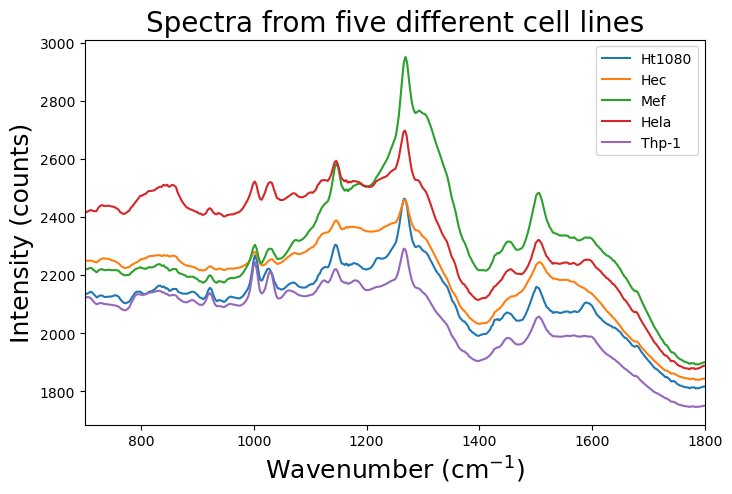

In [9]:
fig, ax = plt.subplots(figsize=(8,5))

# Plot the media spectra on the same axis
ax.plot(wavenumbers, data1[mask_ht1080].iloc[:, 1:].T.mean(axis=1), label='Ht1080')
ax.plot(wavenumbers, data1[mask_hec].iloc[:, 1:].T.mean(axis=1), label='Hec')
ax.plot(wavenumbers, data1[mask_mef].iloc[:, 1:].T.mean(axis=1), label='Mef')
ax.plot(wavenumbers, data1[mask_hela].iloc[:, 1:].T.mean(axis=1), label='Hela')
ax.plot(wavenumbers, data1[mask_thp1].iloc[:, 1:].T.mean(axis=1), label='Thp-1')

# Add axis labels and legend
ax.set_xlim(700, 1800)
ax.set_xlabel('Wavenumber (cm$^{-1}$)', fontsize=18)
ax.set_ylabel('Intensity (counts)', fontsize=18)
ax.set_title('Spectra from five different cell lines', fontsize=20)
ax.legend()

# Show the plot
plt.show()

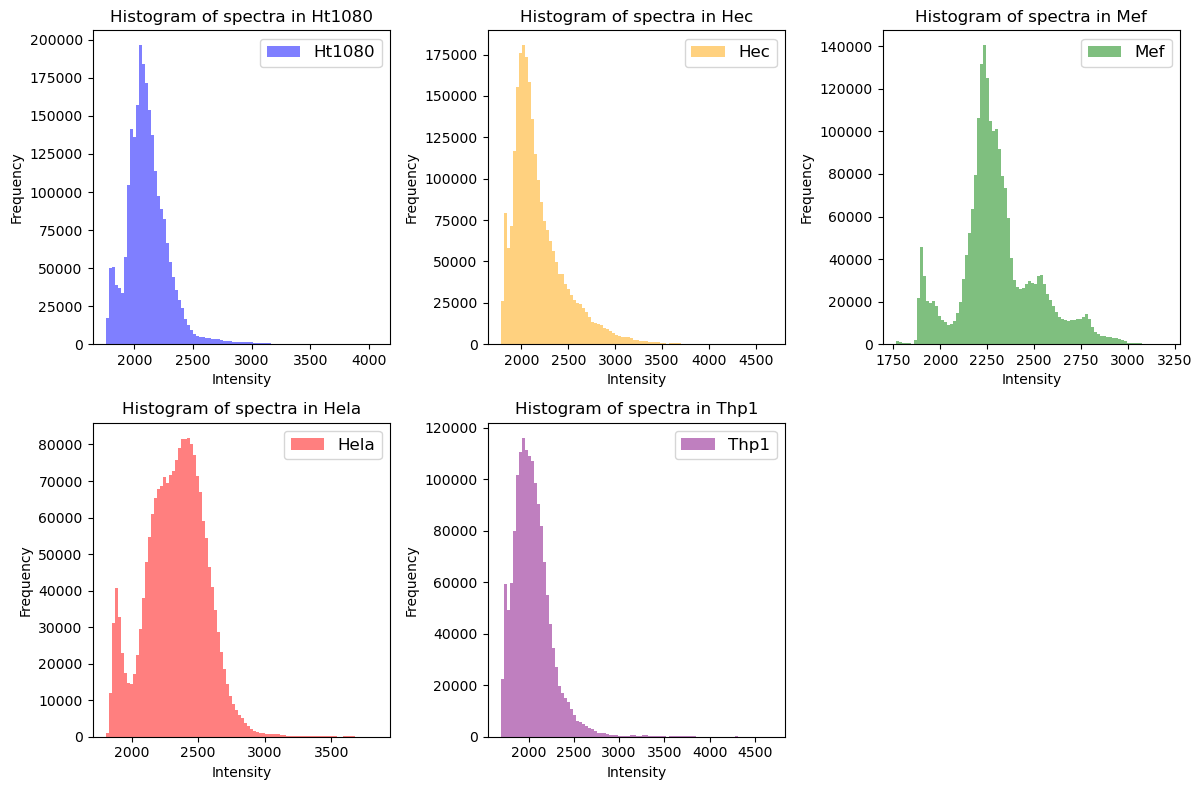

In [11]:
# Create a list of all masks
masks = [mask_ht1080, mask_hec, mask_mef, mask_hela, mask_thp1]

# Set colors for each mask
colors = ['blue', 'orange','green','red','purple']

# Create a new figure object for the subplots
fig = plt.figure(figsize=(12, 8))

# Loop over each mask and plot its histogram in a separate subplot
for i, (mask, color, label) in enumerate(zip(masks, colors, ['Ht1080', 'Hec', 'Mef', 'Hela', 'Thp1'])):
    subset = data1[mask]
    ax = fig.add_subplot(2, 3, i+1)
    ax.hist(subset.iloc[:, 1:].values.ravel(), bins=90, alpha=0.5, color=color, label=label)
    ax.legend(fontsize=12)
    ax.set_xlabel('Intensity', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.set_title(f'Histogram of spectra in {label}',fontsize=12)
plt.tight_layout()
plt.show()


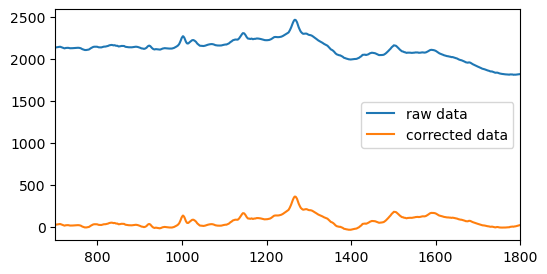

In [13]:
baseline_fitter = Baseline(x_data=wavenumbers)

bkg_21, params_21 = baseline_fitter.asls(data1[mask_ht1080].iloc[:, 1:].T.mean(axis=1), lam=1e7, p=0.02)

#bkg_1, params_1 = baseline_fitter.modpoly(y1, poly_order=3)
#bkg_2, params_2 = baseline_fitter.asls(y1, lam=1e7, p=0.02)
#bkg_3, params_3 = baseline_fitter.mor(y1, half_window=30)
#bkg_4, params_4 = baseline_fitter.snip(y1, max_half_window=40, decreasing=True, smooth_half_window=3)

fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(wavenumbers, data1[mask_ht1080].iloc[:, 1:].T.mean(axis=1), label='raw data', lw=1.5)
ax.plot(wavenumbers, data1[mask_ht1080].iloc[:, 1:].T.mean(axis=1)-bkg_21, label='corrected data')
ax.set_xlim(700,1800)

plt.legend()
plt.show()


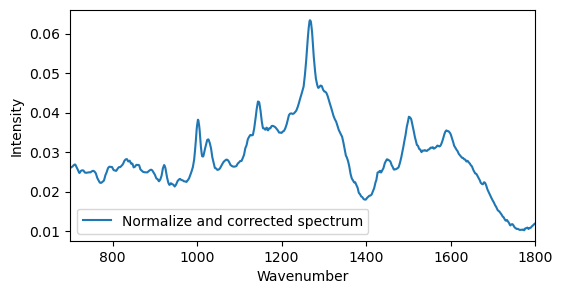

In [58]:
data_media_lb = data1[mask_ht1080].iloc[:, 1:].T.mean(axis=1).values-bkg_21
random_ht1080 = data1[mask_ht1080].sample(n=1).iloc[:, 1:].values

# Create a new figure and axis object
fig, ax = plt.subplots(figsize=(6, 3))

# apply baseline correction to spectral data
#baseline_corrected_ht1080 = random_ht1080 - whittaker_smoother(random_ht1080, 1e8, 2)[:, np.newaxis]
data_media_lb_n = normalize(data_media_lb.reshape(1,-1), norm='l2')

# plot modified spectrum
data_media_lb_n = data_media_lb_n.ravel()
ax.plot(wavenumbers, data_media_lb_n, label='Normalize and corrected spectrum')
ax.set_xlim(700, 1800)

# add labels and legend
plt.xlabel('Wavenumber')
plt.ylabel('Intensity')
ax.legend()

# show plot
plt.show()

In [25]:
data_x = data1.iloc[:, 1:].T
#data_x = data_x.drop(['labels'], axis=0)
bkg = []
data_x_cor = []
for k in range(len(data_x.columns)):
    baseline_fitter = Baseline(x_data=wavenumbers)
    bkg_21, params_21 = baseline_fitter.asls(data_x[k], lam=1e7, p=0.02)
    data_cor = data_x[k].values-bkg_21
    data_cor_n = normalize(data_cor.reshape(1,-1), norm='l2')
    data_cor_n = data_cor_n.ravel()
    bkg.append(bkg_21)
    data_x_cor.append(data_cor_n)
   

In [30]:
from sklearn.preprocessing import OrdinalEncoder
x = np.array(data_x_cor)
y = pd.DataFrame(data1['labels'])
encoder = OrdinalEncoder()
encoder.fit(y)
y = encoder.transform (y)

In [34]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(x)
ts1 = pd.DataFrame(tsne_results) # Convierte los datos pca en un DataFrame

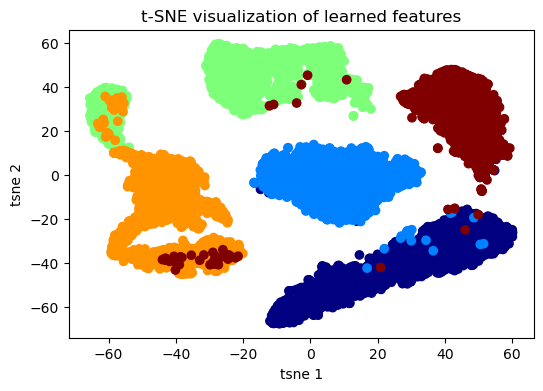

In [63]:
# Plot the t-SNE visualization
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(ts1[0], ts1[1], c=y, cmap='jet')
ax.set_xlabel('tsne 1')
ax.set_ylabel('tsne 2')
plt.title('t-SNE visualization of learned features')
plt.show()

In [85]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(x, y.ravel())
lda = pd.DataFrame(X_lda) # Convierte los datos pca en un DataFrame

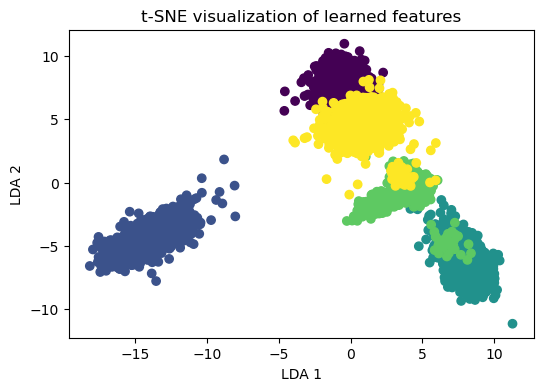

In [93]:
# Plot the t-SNE visualization
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(lda[0], lda[1], c=y, cmap='viridis')
ax.set_xlabel('LDA 1')
ax.set_ylabel('LDA 2')
plt.title('LDA visualization of learned features')
plt.show()

In [40]:
# Convert the labels into numerical values
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
encoder.fit(y)
y = encoder.transform (y)

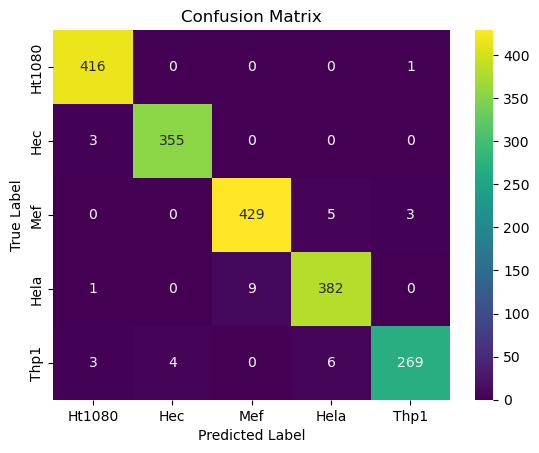

              precision    recall  f1-score   support

      Ht1080       0.98      1.00      0.99       417
         Hec       0.99      0.99      0.99       358
         Mef       0.98      0.98      0.98       437
        Hela       0.97      0.97      0.97       392
        Thp1       0.99      0.95      0.97       282

    accuracy                           0.98      1886
   macro avg       0.98      0.98      0.98      1886
weighted avg       0.98      0.98      0.98      1886

model_logistic accuracy: 0.9814422057264051


In [200]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(x, y.ravel(), test_size=0.2, random_state=42)

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='lbfgs', multi_class='multinomial') 
# For multiclass problems, only 'newton-cg', 'sag', 'saga' and 'lbfgs' handle multinomial loss
model_logistic = logreg.fit(X_train, y_train)
model_logistic
# Create predictions on X_test and create an object from predictions
y_preds = model_logistic.predict(X_test)
# Define the labels for the x and y axis
cm = confusion_matrix(y_test,y_preds)
# Create a heatmap visualization of the confusion matrix
labels = ['Ht1080', 'Hec', 'Mef', 'Hela', 'Thp1']
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d', xticklabels=labels, yticklabels=labels)
# Set the plot title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

target_names = ['Ht1080', 'Hec', 'Mef', 'Hela', 'Thp1']
print(classification_report(y_test,y_preds,target_names=target_names))
print('model_logistic accuracy:', accuracy_score(y_test,y_preds))

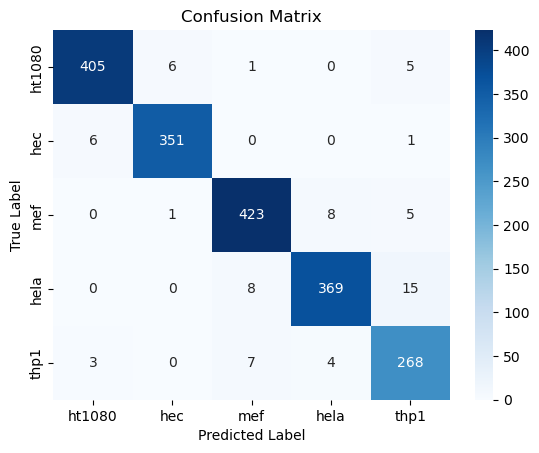

              precision    recall  f1-score   support

      Ht1080       0.98      0.97      0.97       417
         Hec       0.98      0.98      0.98       358
         Mef       0.96      0.97      0.97       437
        Hela       0.97      0.94      0.95       392
        Thp1       0.91      0.95      0.93       282

    accuracy                           0.96      1886
   macro avg       0.96      0.96      0.96      1886
weighted avg       0.96      0.96      0.96      1886

model DecisionTree accuracy: 0.9628844114528102


In [46]:
dtree = DecisionTreeClassifier(criterion='entropy', 
                               class_weight="balanced",
                               random_state=10)
# Fit classifier to X_train and y_train
dtree.fit(X_train, y_train)
# Create predictions on X_test and create an object from predictions
y_preds = dtree.predict(X_test) 

# Define the labels for the x and y axis
cm = confusion_matrix(y_test,y_preds)

# Create a heatmap visualization of the confusion matrix
labels = ['ht1080', 'hec', 'mef', 'hela', 'thp1']
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

# Set the plot title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the plot
plt.show()


target_names = ['Ht1080', 'Hec', 'Mef', 'Hela', 'Thp1']
print(classification_report(y_test,y_preds,target_names=target_names))
print('model DecisionTree accuracy:', accuracy_score(y_test,y_preds))

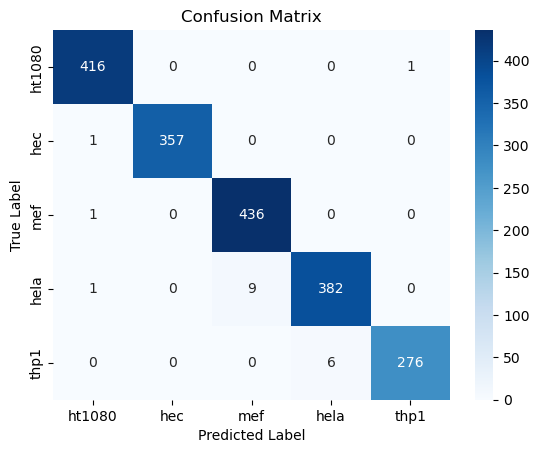

              precision    recall  f1-score   support

      Ht1080       0.99      1.00      1.00       417
         Hec       1.00      1.00      1.00       358
         Mef       0.98      1.00      0.99       437
        Hela       0.98      0.97      0.98       392
        Thp1       1.00      0.98      0.99       282

    accuracy                           0.99      1886
   macro avg       0.99      0.99      0.99      1886
weighted avg       0.99      0.99      0.99      1886

model DecisionTree accuracy: 0.9899257688229056


In [51]:
from sklearn.svm import SVC

# Creación del modelo SVM lineal
# ==============================================================================
sv = SVC(C = 40, kernel = 'rbf', random_state=123)
sv.fit(X_train, y_train)

y_preds = sv.predict(X_test) 

# Define the labels for the x and y axis
cm = confusion_matrix(y_test,y_preds)

# Create a heatmap visualization of the confusion matrix
labels = ['ht1080', 'hec', 'mef', 'hela', 'thp1']
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

# Set the plot title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the plot
plt.show()


target_names = ['Ht1080', 'Hec', 'Mef', 'Hela', 'Thp1']
print(classification_report(y_test,y_preds,target_names=target_names))
print('model DecisionTree accuracy:', accuracy_score(y_test,y_preds))

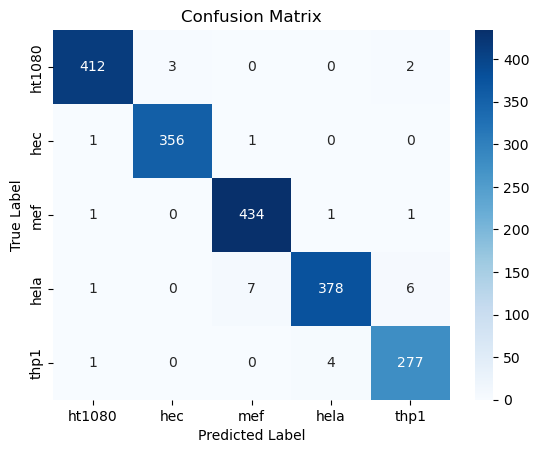

              precision    recall  f1-score   support

      Ht1080       0.99      0.99      0.99       417
         Hec       0.99      0.99      0.99       358
         Mef       0.98      0.99      0.99       437
        Hela       0.99      0.96      0.98       392
        Thp1       0.97      0.98      0.98       282

    accuracy                           0.98      1886
   macro avg       0.98      0.98      0.98      1886
weighted avg       0.98      0.98      0.98      1886

model DecisionTree accuracy: 0.9846235418875928


In [54]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=(20, 20), learning_rate_init=0.01, solver = 'lbfgs', max_iter = 5000, random_state = 123)
ann.fit(X_train, y_train)
y_preds = ann.predict(X_test) 

# Define the labels for the x and y axis
cm = confusion_matrix(y_test,y_preds)

# Create a heatmap visualization of the confusion matrix
labels = ['ht1080', 'hec', 'mef', 'hela', 'thp1']
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

# Set the plot title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the plot
plt.show()


target_names = ['Ht1080', 'Hec', 'Mef', 'Hela', 'Thp1']
print(classification_report(y_test,y_preds,target_names=target_names))
print('model DecisionTree accuracy:', accuracy_score(y_test,y_preds))


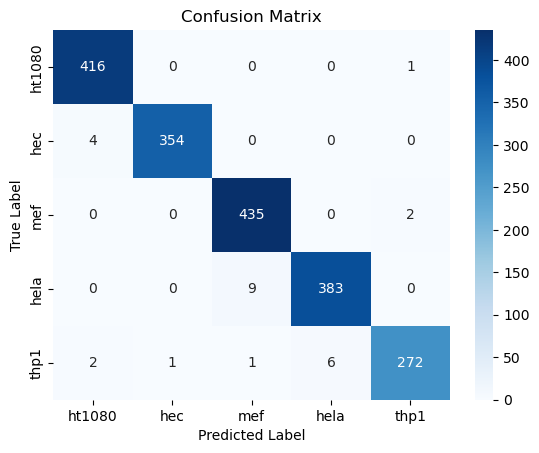

              precision    recall  f1-score   support

      Ht1080       0.99      1.00      0.99       417
         Hec       1.00      0.99      0.99       358
         Mef       0.98      1.00      0.99       437
        Hela       0.98      0.98      0.98       392
        Thp1       0.99      0.96      0.98       282

    accuracy                           0.99      1886
   macro avg       0.99      0.98      0.99      1886
weighted avg       0.99      0.99      0.99      1886

model DecisionTree accuracy: 0.9862142099681867


In [72]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_preds = rfc.predict(X_test) 

# Define the labels for the x and y axis
cm = confusion_matrix(y_test,y_preds)

# Create a heatmap visualization of the confusion matrix
labels = ['ht1080', 'hec', 'mef', 'hela', 'thp1']
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

# Set the plot title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the plot
plt.show()


target_names = ['Ht1080', 'Hec', 'Mef', 'Hela', 'Thp1']
print(classification_report(y_test,y_preds,target_names=target_names))
print('model DecisionTree accuracy:', accuracy_score(y_test,y_preds))

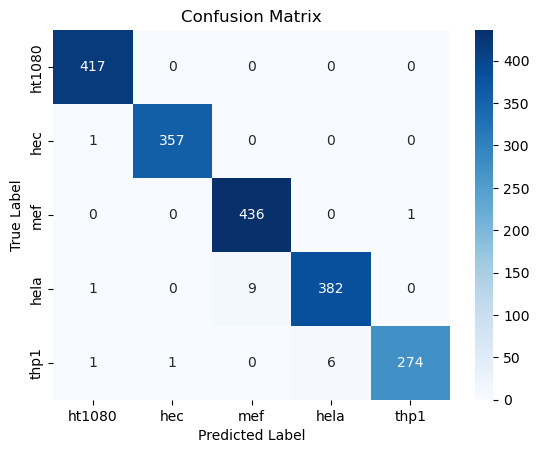

              precision    recall  f1-score   support

      Ht1080       0.99      1.00      1.00       417
         Hec       1.00      1.00      1.00       358
         Mef       0.98      1.00      0.99       437
        Hela       0.98      0.97      0.98       392
        Thp1       1.00      0.97      0.98       282

    accuracy                           0.99      1886
   macro avg       0.99      0.99      0.99      1886
weighted avg       0.99      0.99      0.99      1886

model DecisionTree accuracy: 0.9893955461293743


In [74]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_preds = xgb.predict(X_test) 

# Define the labels for the x and y axis
cm = confusion_matrix(y_test,y_preds)

# Create a heatmap visualization of the confusion matrix
labels = ['ht1080', 'hec', 'mef', 'hela', 'thp1']
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

# Set the plot title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the plot
plt.show()


target_names = ['Ht1080', 'Hec', 'Mef', 'Hela', 'Thp1']
print(classification_report(y_test,y_preds,target_names=target_names))
print('model DecisionTree accuracy:', accuracy_score(y_test,y_preds))

In [96]:
from sklearn.pipeline import Pipeline

In [ ]:
 Crea un pipeline con escalado y regresión logística
pipeline = Pipeline([
    ('escalado', StandardScaler()),
    ('clasificacion', LogisticRegression())
])

In [126]:
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier

models = [
    SVC(C = 40, kernel = 'rbf', random_state=123), NuSVC(gamma='scale'), LinearSVC(),
    SGDClassifier(max_iter=100, tol=1e-3), KNeighborsClassifier(),
    MLPClassifier(hidden_layer_sizes=(20, 20), learning_rate_init=0.01, solver = 'lbfgs', max_iter = 5000, random_state = 123),
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=300),
    RandomForestClassifier(n_estimators=300), LogisticRegression(fit_intercept=False, C=1e12, solver='lbfgs', multi_class='multinomial')
]

def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    #y = LabelEncoder().fit_transform(y)
    model = Pipeline([('estimator', estimator)])

    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)

    expected  = y_test
    predicted = model.predict(X_test)

    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(estimator.__class__.__name__, accuracy_score(expected, predicted)))


In [172]:
cm = []
cl_r = []
for model in models:
    score_model(X_train, y_train, model)
    cmi = confusion_matrix(y_test, model.predict(X_test))
    target_names = ['Ht1080', 'Hec', 'Mef', 'Hela', 'Thp1']
    cl_ri = classification_report(y_test, model.predict(X_test),target_names=target_names)
    cl_r.append(cl_ri)

SVC: 0.9899257688229056
NuSVC: 0.9448568398727466


C:\Users\usuario\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC: 0.9856839872746553
SGDClassifier: 0.9819724284199364
KNeighborsClassifier: 0.986744432661718
MLPClassifier: 0.9846235418875928
BaggingClassifier: 0.9777306468716861
ExtraTreesClassifier: 0.9872746553552492
RandomForestClassifier: 0.9872746553552492
LogisticRegression: 0.9814422057264051


In [174]:
print(cl_r[0])

              precision    recall  f1-score   support

      Ht1080       0.99      1.00      1.00       417
         Hec       1.00      1.00      1.00       358
         Mef       0.98      1.00      0.99       437
        Hela       0.98      0.97      0.98       392
        Thp1       1.00      0.98      0.99       282

    accuracy                           0.99      1886
   macro avg       0.99      0.99      0.99      1886
weighted avg       0.99      0.99      0.99      1886



In [197]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
#from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree

# Load and split the data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Construct some pipelines
pipe_lr = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', LogisticRegression(random_state=42))])

pipe_svm = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', svm.SVC(random_state=42))])
			
pipe_dt = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', tree.DecisionTreeClassifier(random_state=42))])

# List of pipelines for ease of iteration
pipelines = [pipe_lr, pipe_svm, pipe_dt]
			
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Support Vector Machine', 2: 'Decision Tree'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, y_train)

# Compare accuracies
for idx, val in enumerate(pipelines):
	print('%s pipeline test accuracy: %.3f' % (pipe_dict[idx], val.score(X_test, y_test)))

# Identify the most accurate model on test data
best_acc = 0.0
best_clf = 0
best_pipe = ''
for idx, val in enumerate(pipelines):
	if val.score(X_test, y_test) > best_acc:
		best_acc = val.score(X_test, y_test)
		best_pipe = val
		best_clf = idx
print('Classifier with best accuracy: %s' % pipe_dict[best_clf])

# Save pipeline to file
#joblib.dump(best_pipe, 'best_pipeline.pkl', compress=1)
print('Saved %s pipeline to file' % pipe_dict[best_clf])

Logistic Regression pipeline test accuracy: 0.900
Support Vector Machine pipeline test accuracy: 0.900
Decision Tree pipeline test accuracy: 0.867
Classifier with best accuracy: Logistic Regression
Saved Logistic Regression pipeline to file
